In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, r2_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

from google.colab import drive
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0}) # Hide warnings

In [2]:
# Connecting to google drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Drew Project/

/content/drive/My Drive/Drew Project


In [4]:
df = pd.read_csv('data.csv')
df.head()

,How old are you?,Where are you currently based/living?,Are you currently in education?,How many hours a week do you spend studying?,Are you currently employed?,Do you have any physical health issues or a disability?,Have you been previously diagnosed with a mental health condition?,How much time a day do you spend on social media?,"How many hours a week do you take in health/wellbeing activities? (e.g. gym, fitness)",How often do you find it hard to wind down?,...,"Do you experience breathing difficulties (eg, excessively rapid breathing, breathlessness in the absence of physical exertion) ?",Do you have difficulties working up the initiative to do things?,"Do you experiences trembling (eg, in the hands, legs)?",Do you find yourself worrying about situations in which you might panic and make a fool of yourself?,Do you find yourself feeling that you have nothing to look forward to?,Do you find yourself feeling down-hearted?,Do you find yourself unable to become enthusiastic about anything?,Do you find yourself feeling that life can be meaningless?,Do you find yourself feeling scared without any good reason?,outcome
0,29,United Kingdom,Yes,10,"Employed, full time",No,No,1-2 hours,3-4 hours,1,...,0,2,1,1,2,1,2,1,0,Low signs of despression
1,28,United Kingdom,Yes,10,"Employed, part time",No,No,3-4 hours,0,1,...,0,0,0,2,2,2,1,0,1,very Low/low Signs
2,28,United Kingdom,Yes,20,"Employed, part time",No,No,3-4 hours,3-4 hours,3,...,0,1,0,0,0,0,0,0,0,No signs of depression
3,26,United Kingdom,Yes,6,Not employed,No,Prefer not to say,3-4 hours,0,1,...,0,1,0,1,0,1,1,1,0,Low signs of despression
4,33,United Kingdom,Yes,2,"Employed, part time",No,No,5+ hours,1-2 hours,0,...,0,2,0,2,2,2,2,2,2,Low signs of despression


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 22 columns):
 #   Column                                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                                            --------------  ----- 
 0   How old are you?                                                                                                                  291 non-null    int64 
 1   Where are you currently based/living?                                                                                             291 non-null    object
 2   Are you currently in education?                                                                                                   291 non-null    object
 3   How many hours a week do you spend studying?                                                        

In [6]:
df.describe()

,How old are you?,How many hours a week do you spend studying?,How often do you find it hard to wind down?,How often do you experience dryness of my mouth?,How often do you struggle to experience feeling positive?,"Do you experience breathing difficulties (eg, excessively rapid breathing, breathlessness in the absence of physical exertion) ?",Do you have difficulties working up the initiative to do things?,"Do you experiences trembling (eg, in the hands, legs)?",Do you find yourself worrying about situations in which you might panic and make a fool of yourself?,Do you find yourself feeling that you have nothing to look forward to?,Do you find yourself feeling down-hearted?,Do you find yourself unable to become enthusiastic about anything?,Do you find yourself feeling that life can be meaningless?,Do you find yourself feeling scared without any good reason?
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,27.134021,19.068729,1.525773,0.945017,1.391753,0.518900,1.353952,0.432990,1.381443,1.000000,1.309278,1.158076,0.945017,0.986254
std,3.425952,12.509944,0.876035,0.777086,0.881496,0.776033,0.929484,0.662918,1.051534,0.975563,0.913812,0.899671,0.956142,1.040466
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,10.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000
50%,28.000000,18.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,29.000000,27.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,35.000000,60.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


### Data Cleaning

In [7]:
print(len(df.columns))

df.columns

22


Index(['How old are you?', 'Where are you currently based/living?',
       'Are you currently in education?',
       'How many hours a week do you spend studying?',
       'Are you currently employed?',
       'Do you have any physical health issues or a disability? ',
       ' Have you been previously diagnosed with a mental health condition?',
       'How much time a day do you spend on social media? ',
       'How many hours a week do you take in health/wellbeing activities? (e.g. gym, fitness)',
       'How often do you find it hard to wind down?',
       'How often do you experience dryness of my mouth?',
       'How often do you struggle to experience feeling positive?',
       'Do you experience breathing difficulties (eg, excessively rapid breathing, breathlessness in the absence of physical exertion) ?',
       'Do you have difficulties working up the initiative to do things?',
       'Do you experiences trembling (eg, in the hands, legs)?',
       'Do you find yourself worryi

In [8]:
# Rename the columns
new_col = ['age','address','schooling','stud_hr','employed','h_disab',
           'ment_cond','social_hr','fit_hr','wind','dry_mouth',
           'positive','breath_diff','initiate','tremb','worry','look_fwd',
           'down','enthus','life_mean','scared','outcome']

print(len(new_col))
print(new_col)

22
['age', 'address', 'schooling', 'stud_hr', 'employed', 'h_disab', 'ment_cond', 'social_hr', 'fit_hr', 'wind', 'dry_mouth', 'positive', 'breath_diff', 'initiate', 'tremb', 'worry', 'look_fwd', 'down', 'enthus', 'life_mean', 'scared', 'outcome']


In [9]:
df.columns = new_col

df.head()

,age,address,schooling,stud_hr,employed,h_disab,ment_cond,social_hr,fit_hr,wind,...,breath_diff,initiate,tremb,worry,look_fwd,down,enthus,life_mean,scared,outcome
0,29,United Kingdom,Yes,10,"Employed, full time",No,No,1-2 hours,3-4 hours,1,...,0,2,1,1,2,1,2,1,0,Low signs of despression
1,28,United Kingdom,Yes,10,"Employed, part time",No,No,3-4 hours,0,1,...,0,0,0,2,2,2,1,0,1,very Low/low Signs
2,28,United Kingdom,Yes,20,"Employed, part time",No,No,3-4 hours,3-4 hours,3,...,0,1,0,0,0,0,0,0,0,No signs of depression
3,26,United Kingdom,Yes,6,Not employed,No,Prefer not to say,3-4 hours,0,1,...,0,1,0,1,0,1,1,1,0,Low signs of despression
4,33,United Kingdom,Yes,2,"Employed, part time",No,No,5+ hours,1-2 hours,0,...,0,2,0,2,2,2,2,2,2,Low signs of despression


In [10]:
df.outcome.unique()

array(['Low signs of despression ', 'very Low/low Signs ',
       'No signs of depression', 'Medium/High ',
       'High signs of depression ', 'high signs of depression '],
      dtype=object)

In [11]:
# Here you'll notice that 'High signs of depression' was missplet as 'high signs of depression '
# We'll rename and replace

df['outcome'] = df['outcome'].str.replace('high signs of depression ','High signs of depression ')

In [12]:
df.head(1).T

,0
age,29
address,United Kingdom
schooling,Yes
stud_hr,10
employed,"Employed, full time"
h_disab,No
ment_cond,No
social_hr,1-2 hours
fit_hr,3-4 hours
wind,1


In [13]:
# To display th Value counts

for i in df.columns:
    display(df.groupby(i).count().T.head(1).reset_index().drop('index',axis=1))


age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,4,2,4,12,14,12,14,23,15,26,65,45,15,11,14,9,4,2


address,United Kingdom
0,291


schooling,Yes
0,291


stud_hr,1,2,3,4,5,6,7,8,9,10,...,34,35,37,40,42,43,44,45,50,60
0,4,9,5,11,14,8,5,6,4,31,...,1,6,1,12,1,1,1,7,4,3


employed,"Employed, full time","Employed, part time",Not employed
0,138,103,50


h_disab,No,Prefer not to say,Yes
0,252,6,33


ment_cond,No,Prefer not to say,Yes
0,226,13,52


social_hr,1-2 hours,3-4 hours,5+ hours
0,71,122,98


fit_hr,0,1-2 hours,3-4 hours,5+ hours
0,97,77,56,61


wind,0,1,2,3
0,33,114,102,42


dry_mouth,0,1,2,3
0,89,136,59,7


positive,0,1,2,3
0,45,120,93,33


breath_diff,0,1,2,3
0,184,70,30,7


initiate,0,1,2,3
0,56,112,87,36


tremb,0,1,2,3
0,190,79,19,3


worry,0,1,2,3
0,76,78,87,50


look_fwd,0,1,2,3
0,110,99,54,28


down,0,1,2,3
0,59,114,87,31


enthus,0,1,2,3
0,73,124,69,25


life_mean,0,1,2,3
0,118,94,56,23


scared,0,1,2,3
0,124,82,50,35


outcome,High signs of depression,Low signs of despression,Medium/High,No signs of depression,very Low/low Signs
0,86,62,26,64,53


In [14]:
# Dropping schooling and address columns because they have only 1  values each

df.drop(['schooling','address'],axis=1, inplace=True)
df.head()

,age,stud_hr,employed,h_disab,ment_cond,social_hr,fit_hr,wind,dry_mouth,positive,breath_diff,initiate,tremb,worry,look_fwd,down,enthus,life_mean,scared,outcome
0,29,10,"Employed, full time",No,No,1-2 hours,3-4 hours,1,2,1,0,2,1,1,2,1,2,1,0,Low signs of despression
1,28,10,"Employed, part time",No,No,3-4 hours,0,1,1,1,0,0,0,2,2,2,1,0,1,very Low/low Signs
2,28,20,"Employed, part time",No,No,3-4 hours,3-4 hours,3,2,2,0,1,0,0,0,0,0,0,0,No signs of depression
3,26,6,Not employed,No,Prefer not to say,3-4 hours,0,1,1,1,0,1,0,1,0,1,1,1,0,Low signs of despression
4,33,2,"Employed, part time",No,No,5+ hours,1-2 hours,0,0,2,0,2,0,2,2,2,2,2,2,Low signs of despression


### Univariate Analysis

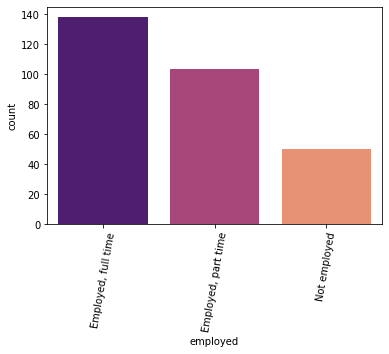

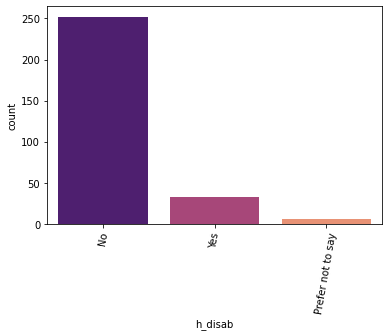

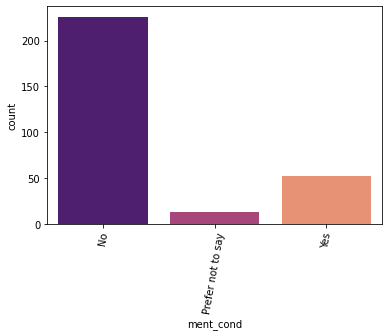

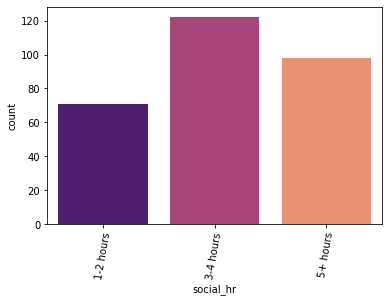

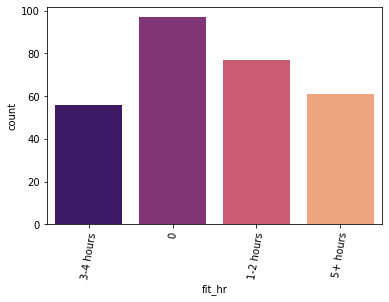

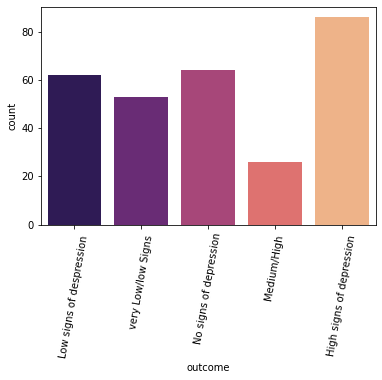

In [15]:
# Distribution of Categotical Varriable

df1 = df.select_dtypes(exclude=['int64'])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df1,palette='magma')
    plt.yticks(size=10)
    plt.xticks(rotation=80, size=10)
    plt.show()

In [16]:
# Findings

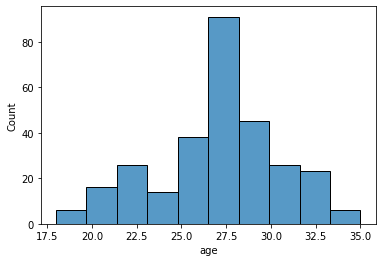

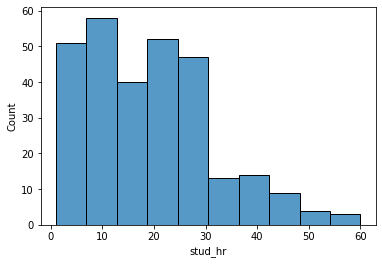

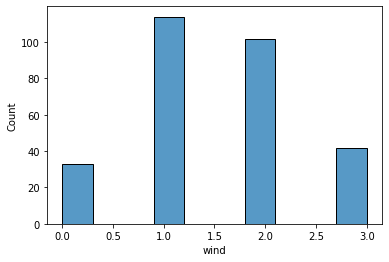

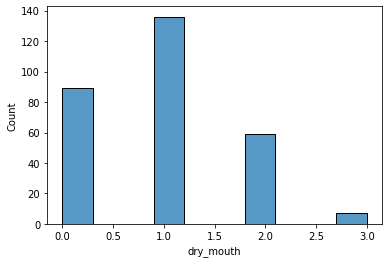

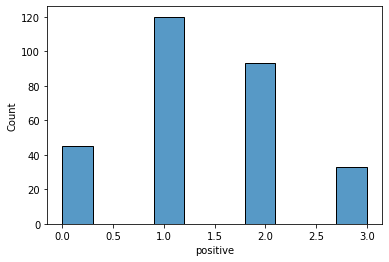

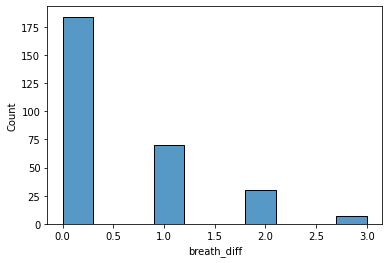

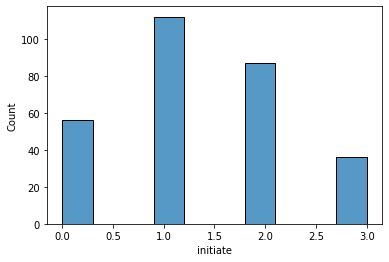

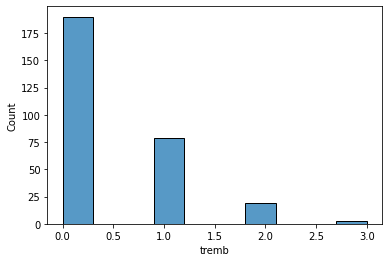

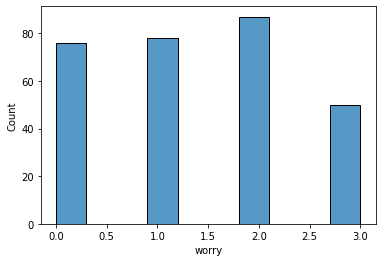

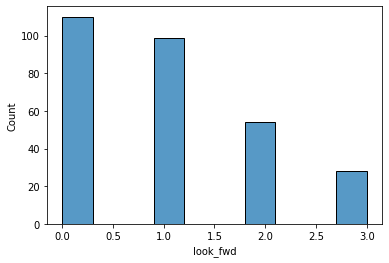

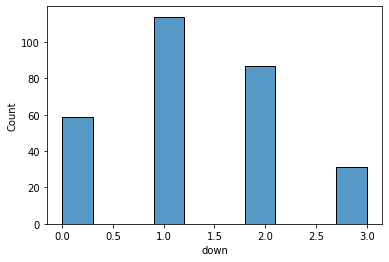

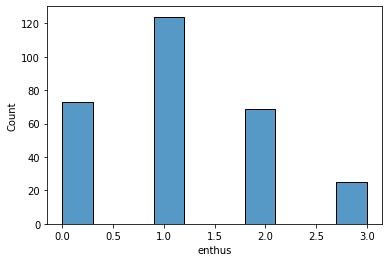

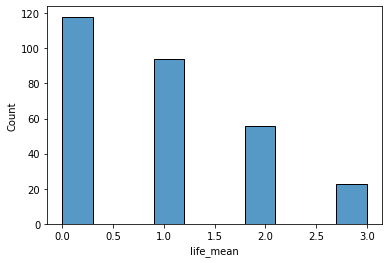

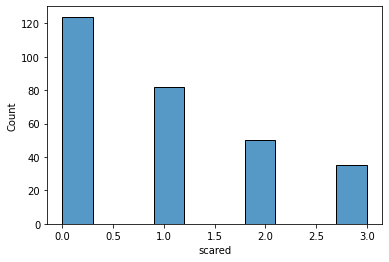

In [17]:
# Distribution of Numerical Varriable

df1 = df.select_dtypes(include=['int64'])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.histplot(x=col, data=df1,bins=10)
    plt.show()

In [18]:
# Findings

### Bivariate Analysis

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

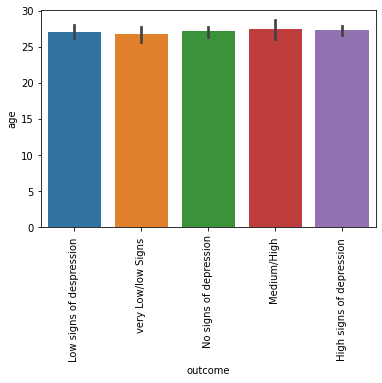

In [19]:
sns.barplot(data=df, x="outcome", y="age");
plt.yticks(size=10)
plt.xticks(rotation=90, size=10)

## Multivariate Analysis

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

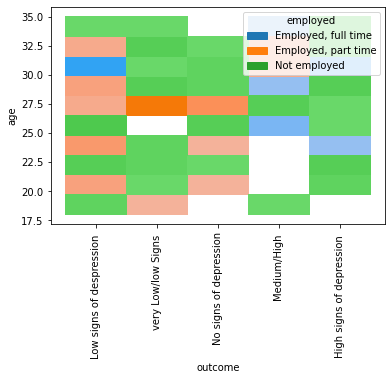

In [20]:
sns.histplot(
    df,x="outcome", y="age", hue="employed", legend=True,bins=10
);
plt.yticks(size=10)
plt.xticks(rotation=90, size=10)

In [21]:
df.corr()

,age,stud_hr,wind,dry_mouth,positive,breath_diff,initiate,tremb,worry,look_fwd,down,enthus,life_mean,scared
age,1.000000,-0.053559,-0.085602,-0.096956,0.064766,-0.043109,0.090091,-0.034749,0.037449,0.014444,0.041787,-0.035985,0.022258,0.017931
stud_hr,-0.053559,1.000000,-0.019670,0.069914,-0.008704,0.095768,0.047425,-0.036033,-0.040009,-0.002825,0.012010,-0.050909,-0.055034,0.012789
wind,-0.085602,-0.019670,1.000000,0.148985,0.348577,0.231336,0.291550,0.051971,0.204532,0.302612,0.394912,0.266075,0.314573,0.291692
dry_mouth,-0.096956,0.069914,0.148985,1.000000,0.127199,0.270480,0.036585,0.186944,0.046855,0.081875,0.218268,0.116053,0.079455,0.054505
positive,0.064766,-0.008704,0.348577,0.127199,1.000000,0.256302,0.427804,0.174899,0.329289,0.409003,0.563962,0.530376,0.512507,0.490894
breath_diff,-0.043109,0.095768,0.231336,0.270480,0.256302,1.000000,0.318162,0.305776,0.267918,0.341607,0.409909,0.351313,0.396424,0.324892
initiate,0.090091,0.047425,0.291550,0.036585,0.427804,0.318162,1.000000,0.220505,0.415293,0.456337,0.548657,0.559647,0.464299,0.393698
tremb,-0.034749,-0.036033,0.051971,0.186944,0.174899,0.305776,0.220505,1.000000,0.232191,0.149295,0.233559,0.260655,0.162815,0.208633
worry,0.037449,-0.040009,0.204532,0.046855,0.329289,0.267918,0.415293,0.232191,1.000000,0.430262,0.508394,0.439051,0.360472,0.603640
look_fwd,0.014444,-0.002825,0.302612,0.081875,0.409003,0.341607,0.456337,0.149295,0.430262,1.000000,0.696245,0.746476,0.665421,0.587712


In [22]:
df.corr()

,age,stud_hr,wind,dry_mouth,positive,breath_diff,initiate,tremb,worry,look_fwd,down,enthus,life_mean,scared
age,1.000000,-0.053559,-0.085602,-0.096956,0.064766,-0.043109,0.090091,-0.034749,0.037449,0.014444,0.041787,-0.035985,0.022258,0.017931
stud_hr,-0.053559,1.000000,-0.019670,0.069914,-0.008704,0.095768,0.047425,-0.036033,-0.040009,-0.002825,0.012010,-0.050909,-0.055034,0.012789
wind,-0.085602,-0.019670,1.000000,0.148985,0.348577,0.231336,0.291550,0.051971,0.204532,0.302612,0.394912,0.266075,0.314573,0.291692
dry_mouth,-0.096956,0.069914,0.148985,1.000000,0.127199,0.270480,0.036585,0.186944,0.046855,0.081875,0.218268,0.116053,0.079455,0.054505
positive,0.064766,-0.008704,0.348577,0.127199,1.000000,0.256302,0.427804,0.174899,0.329289,0.409003,0.563962,0.530376,0.512507,0.490894
breath_diff,-0.043109,0.095768,0.231336,0.270480,0.256302,1.000000,0.318162,0.305776,0.267918,0.341607,0.409909,0.351313,0.396424,0.324892
initiate,0.090091,0.047425,0.291550,0.036585,0.427804,0.318162,1.000000,0.220505,0.415293,0.456337,0.548657,0.559647,0.464299,0.393698
tremb,-0.034749,-0.036033,0.051971,0.186944,0.174899,0.305776,0.220505,1.000000,0.232191,0.149295,0.233559,0.260655,0.162815,0.208633
worry,0.037449,-0.040009,0.204532,0.046855,0.329289,0.267918,0.415293,0.232191,1.000000,0.430262,0.508394,0.439051,0.360472,0.603640
look_fwd,0.014444,-0.002825,0.302612,0.081875,0.409003,0.341607,0.456337,0.149295,0.430262,1.000000,0.696245,0.746476,0.665421,0.587712


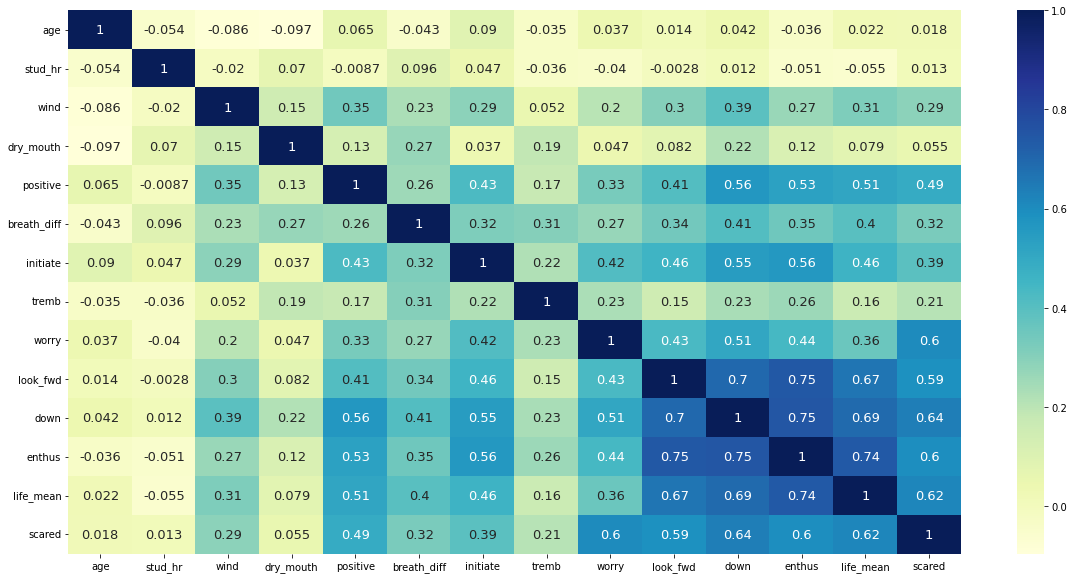

In [23]:
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(20,10)) 
#mask = np.triu(np.ones_like(df.corr()))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,annot_kws={'size': 13},ax=ax)
  
# displaying heatmap
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

df_copy=df.copy()
df_cat= df_copy.select_dtypes(exclude=['int64'])
le = LabelEncoder()
df_cat.apply(le.fit_transform)

,employed,h_disab,ment_cond,social_hr,fit_hr,outcome
0,0,0,0,0,2,1
1,1,0,0,1,0,4
2,1,0,0,1,2,3
3,2,0,1,1,0,1
4,1,0,0,2,1,1
...,...,...,...,...,...,...
286,0,0,0,1,2,1
287,0,0,2,2,2,0
288,1,0,0,2,3,4
289,0,2,0,0,3,3


In [25]:
df_copy[df_cat.columns] = df_cat.apply(le.fit_transform)
df_copy.head()

,age,stud_hr,employed,h_disab,ment_cond,social_hr,fit_hr,wind,dry_mouth,positive,breath_diff,initiate,tremb,worry,look_fwd,down,enthus,life_mean,scared,outcome
0,29,10,0,0,0,0,2,1,2,1,0,2,1,1,2,1,2,1,0,1
1,28,10,1,0,0,1,0,1,1,1,0,0,0,2,2,2,1,0,1,4
2,28,20,1,0,0,1,2,3,2,2,0,1,0,0,0,0,0,0,0,3
3,26,6,2,0,1,1,0,1,1,1,0,1,0,1,0,1,1,1,0,1
4,33,2,1,0,0,2,1,0,0,2,0,2,0,2,2,2,2,2,2,1


In [26]:
df_copy.corr()['outcome']

age           -0.043389
stud_hr        0.051836
employed       0.062884
h_disab       -0.035877
ment_cond     -0.300022
social_hr     -0.141125
fit_hr        -0.082354
wind          -0.198029
dry_mouth     -0.179877
positive      -0.450896
breath_diff   -0.090151
initiate      -0.333304
tremb         -0.120952
worry         -0.450716
look_fwd      -0.381967
down          -0.480399
enthus        -0.474506
life_mean     -0.467002
scared        -0.491089
outcome        1.000000
Name: outcome, dtype: float64

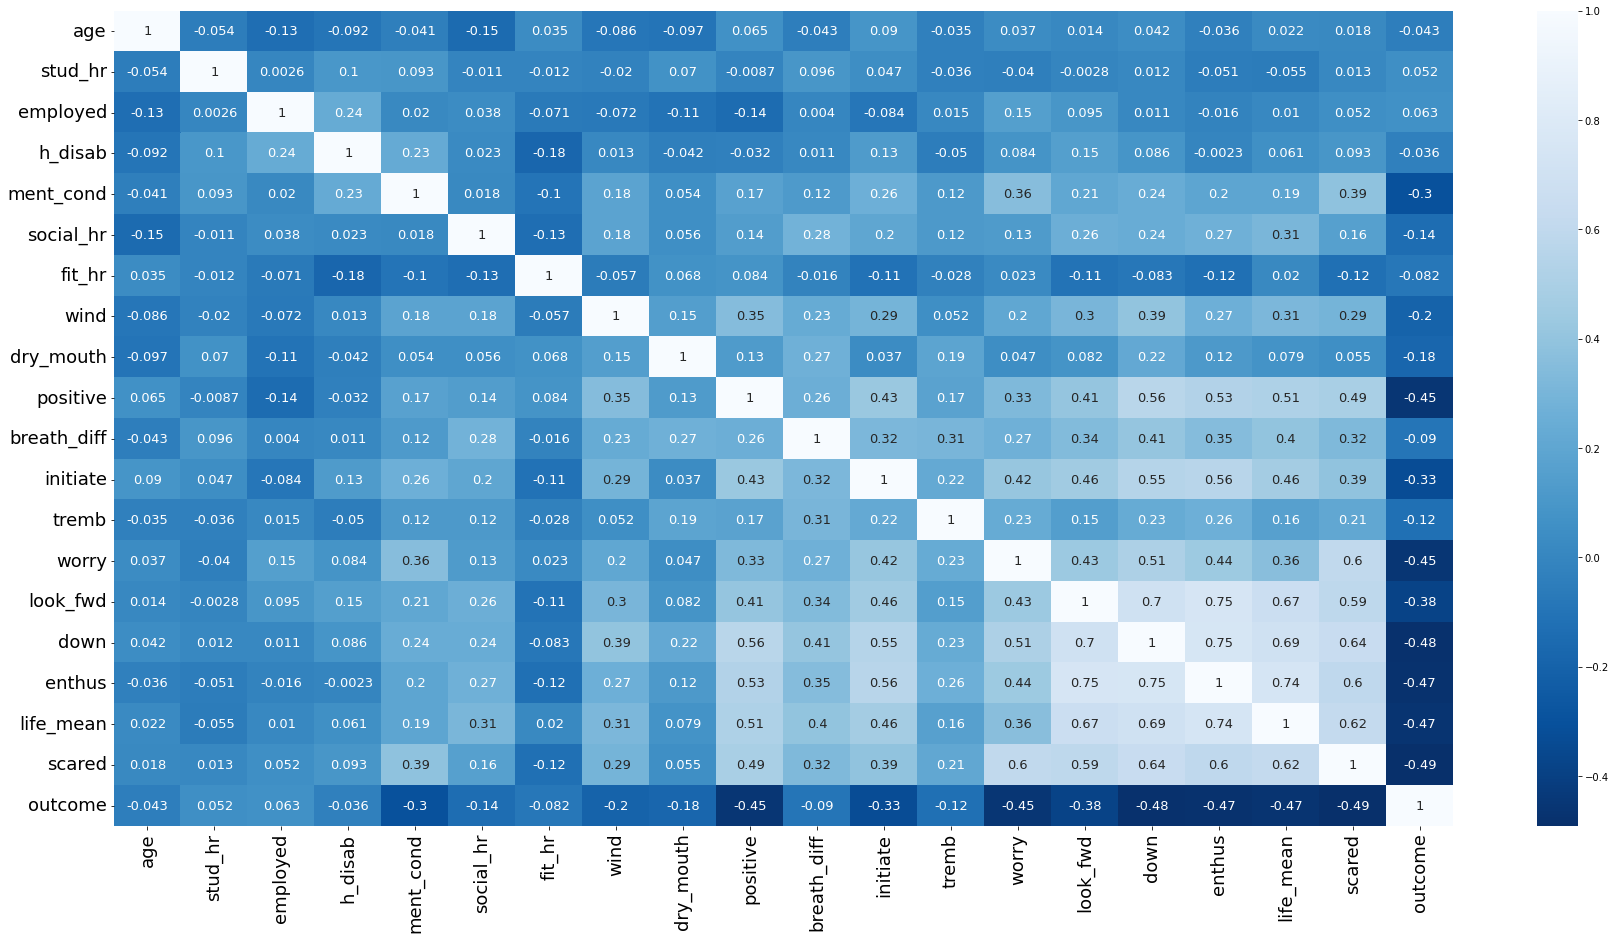

In [27]:
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(30,15)) 
#mask = np.triu(np.ones_like(df.corr()))
dataplot = sns.heatmap(df_copy.corr(), cmap='Blues_r', annot=True,annot_kws={'size': 13},ax=ax)
plt.yticks(size=18)
plt.xticks(rotation=90, size=18)
# displaying heatmap
plt.show()

## Modelling

In [28]:
# Classification Modeling

# Split dataset
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [29]:
X.head()

,age,stud_hr,employed,h_disab,ment_cond,social_hr,fit_hr,wind,dry_mouth,positive,breath_diff,initiate,tremb,worry,look_fwd,down,enthus,life_mean,scared
0,29,10,"Employed, full time",No,No,1-2 hours,3-4 hours,1,2,1,0,2,1,1,2,1,2,1,0
1,28,10,"Employed, part time",No,No,3-4 hours,0,1,1,1,0,0,0,2,2,2,1,0,1
2,28,20,"Employed, part time",No,No,3-4 hours,3-4 hours,3,2,2,0,1,0,0,0,0,0,0,0
3,26,6,Not employed,No,Prefer not to say,3-4 hours,0,1,1,1,0,1,0,1,0,1,1,1,0
4,33,2,"Employed, part time",No,No,5+ hours,1-2 hours,0,0,2,0,2,0,2,2,2,2,2,2


In [30]:
# Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
# Data Scaling

# First we need to know which columns are binary, nominal and numerical
def get_columns_by_category():
    categorical_mask = X.select_dtypes(
        include=['object']).apply(pd.Series.nunique) == 2
    numerical_mask = X.select_dtypes(
        include=['int64', 'float64']).apply(pd.Series.nunique) > 5

    binary_columns = X[categorical_mask.index[categorical_mask]].columns
    nominal_columns = X[categorical_mask.index[~categorical_mask]].columns
    numerical_columns = X[numerical_mask.index[numerical_mask]].columns

    return binary_columns, nominal_columns, numerical_columns

In [32]:
binary_columns, nominal_columns, numerical_columns = get_columns_by_category()

In [33]:
# Now we can create a column transformer pipeline

transformers = [('binary', OrdinalEncoder(), binary_columns),
                ('nominal', OneHotEncoder(), nominal_columns),
                ('numerical', StandardScaler(), numerical_columns)]

transformer_pipeline = ColumnTransformer(transformers, remainder='passthrough')

In [34]:
# Starified k cross validation
Kfold = StratifiedKFold(n_splits=5)

In [35]:
# Lets stack up our classifiers:

RANDOM_STATE = 42
classifiers = [LogisticRegression(max_iter=70, solver='sag', random_state=RANDOM_STATE),
               DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE),
               SVC(C=2, kernel='linear', random_state=RANDOM_STATE),
               RandomForestClassifier(
                   max_depth=7, min_samples_split=5, min_samples_leaf=5, random_state=RANDOM_STATE),
               AdaBoostClassifier(DecisionTreeClassifier(
                   max_depth=1, random_state=RANDOM_STATE), random_state=RANDOM_STATE),
               GradientBoostingClassifier(
                   learning_rate=0.005, n_estimators=30, random_state=RANDOM_STATE),
               KNeighborsClassifier(),
               GaussianNB(var_smoothing=1e-2)
               ]

In [36]:
classifiers_names = ['Logistic Regression',
                     'Decision Tree Classifier',
                     'Support Vector Machine',
                     'Random Forest Classifier',
                     'AdaBoost Classifier',
                     'Gradient Boosting Classifier',
                     'K Neighbors Classifier',
                     'Gaussian Naive Bayes']

pipelines = [Pipeline([('transformer', transformer_pipeline), (classifier_name, classifier)])
             for classifier_name, classifier in zip(classifiers_names, classifiers)]

In [37]:
# Cross Validation.

def cv_fit_models():
    train_acc_results = []
    cv_scores = {classifier_name: [] for classifier_name in classifiers_names}
    for classifier_name, pipeline in zip(classifiers_names, pipelines):
        cv_score = cross_validate(pipeline,
                                  X_train,
                                  y_train,
                                  scoring=scoring,
                                  cv=Kfold,
                                  return_train_score=True,
                                  return_estimator=True)

        train_accuracy = cv_score['train_acc'].mean() * 100
        
        train_acc_results.append(train_accuracy)
        cv_scores[classifier_name].append(cv_score)

    return np.array(train_acc_results), cv_scores

In [38]:
scoring = {'acc': 'accuracy'}

results, folds_scores = cv_fit_models()

In [39]:
# Pick the best fold for each model according to the highest test accuracy:

def pick_best_estimator():
    best_estimators = {classifier_name: [] for classifier_name in classifiers_names}
    for key, model in folds_scores.items():
        best_acc_idx = np.argmax(model[0]['test_acc'])
        best_model = model[0]['estimator'][best_acc_idx]
        best_estimators[key].append(best_model)
    return best_estimators

In [40]:
best_estimators = pick_best_estimator()

In [41]:
# Now we finally can get the accuracy scores of each best fold 
# and at the same time get their precision & recall scores:

def gather_metrics_scores():
    test_accs, precisions, recalls = [], [], []
    for estimator_val in best_estimators.values():
        estimator = estimator_val[0]
        y_pred = estimator.predict(X_test)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        score = estimator.score(X_test, y_test)

        test_accs.append(score)
        precisions.append(precision)
        recalls.append(recall)
        
    scores = {'test_acc': np.array(test_accs),
              'precision': np.array(precisions),
              'recall': np.array(recalls)}
    
    return scores

In [42]:
scores = gather_metrics_scores()

In [43]:
# Plot metrics

def plot_train_test_accuracy(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='train_accuracy',
                y='Model', orient='h', ax=ax[0],
               order=df.sort_values('train_accuracy',ascending = False).Model)
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_accuracy',
                y='Model', orient='h', ax=ax[1],
               order=df.sort_values('test_accuracy',ascending = False).Model)
    ax[1].set_xlim([0, 100])

In [44]:
results_df = pd.DataFrame({'Model': classifiers_names,
                           'train_accuracy': results,
                           'test_accuracy': scores['test_acc'] * 100,
                           'test_precision': scores['precision'] * 100,
                           'test_recall': scores['recall'] * 100})

In [45]:
results_df

,Model,train_accuracy,test_accuracy,test_precision,test_recall
0,Logistic Regression,87.157964,75.342466,71.995749,75.342466
1,Decision Tree Classifier,67.086371,64.383562,48.184309,64.383562
2,Support Vector Machine,93.349097,76.712329,73.306648,76.712329
3,Random Forest Classifier,90.021675,79.452055,79.570658,79.452055
4,AdaBoost Classifier,69.142857,72.602740,73.707347,72.602740
5,Gradient Boosting Classifier,79.359606,67.123288,62.945791,67.123288
6,K Neighbors Classifier,74.424959,68.493151,70.225969,68.493151
7,Gaussian Naive Bayes,82.568801,78.082192,78.745285,78.082192


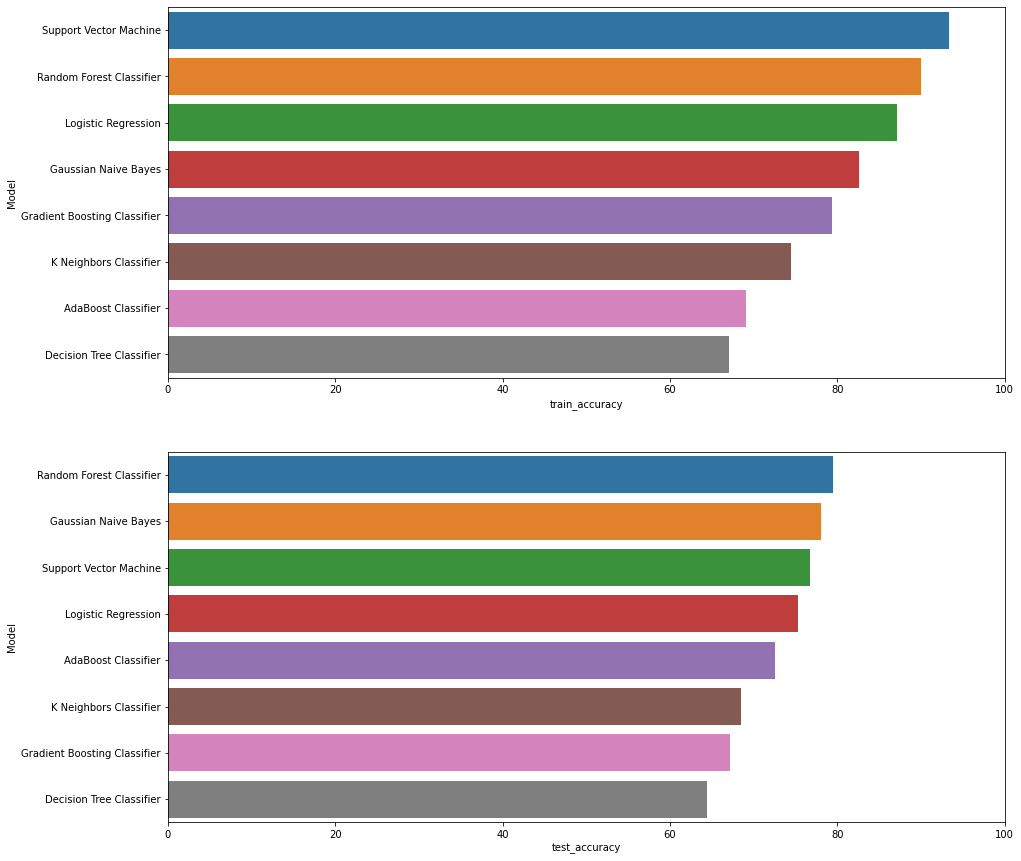

In [46]:
plot_train_test_accuracy(results_df)

In [47]:
def plot_precision_recall(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='test_precision',
                y='Model', orient='h', ax=ax[0],
               order=df.sort_values('test_precision',ascending = False).Model)
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_recall',
                y='Model', orient='h', ax=ax[1],
               order=df.sort_values('test_recall',ascending = False).Model)
    ax[1].set_xlim([0, 100])

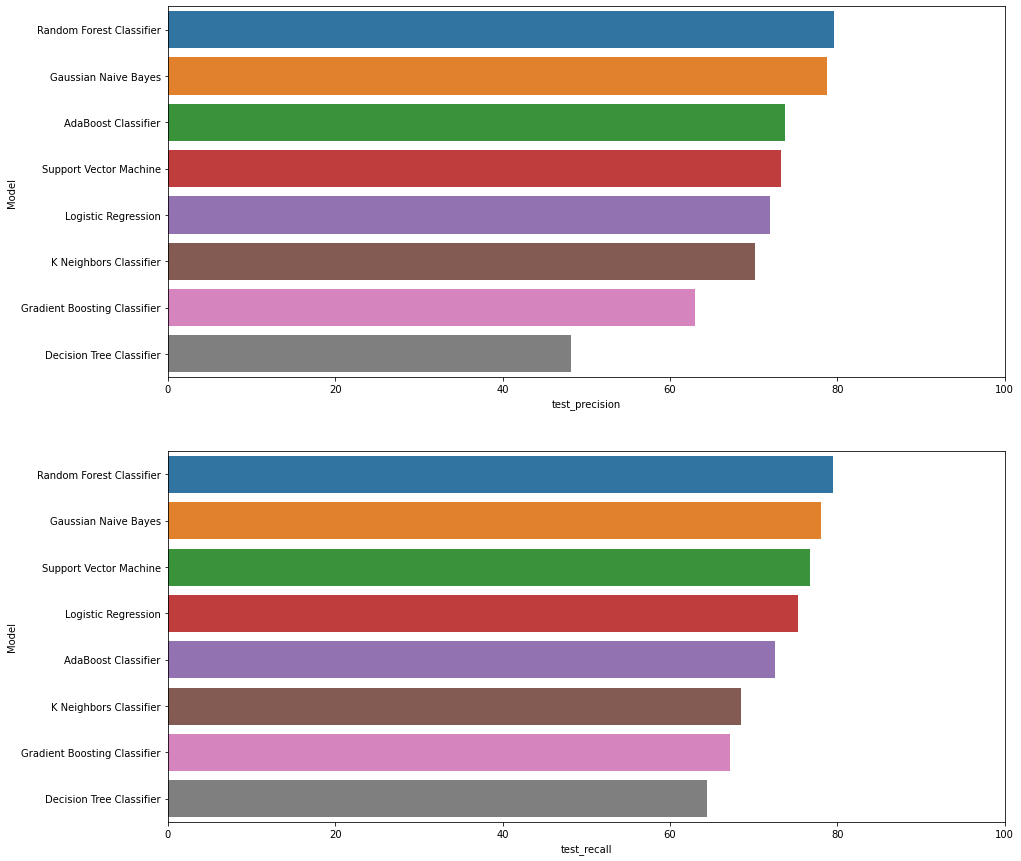

In [48]:
plot_precision_recall(results_df)

## Conclusion:

### Generally, Random Forest Classifier seem to give us the best results.
### Overfitting was noticed in Support Vector result 

## Limitations:
> The dataset does't contain enough numerical columns hence enough analysis could't be done

## Now we'll implement Random Forest Classifier and check the metrics.

In [49]:
modl =  best_estimators['Random Forest Classifier'][0]

In [50]:
# Check predictionj for first row

data = df.head(1)

pred= modl.predict(data)

print(pred)

['Low signs of despression ']


In [51]:
pred

array(['Low signs of despression '], dtype=object)

In [52]:
pred.tolist()[0]

'Low signs of despression '

Accuracy_score is: 0.7945205479452054
Classification report
                           precision    recall  f1-score   support

High signs of depression        0.89      1.00      0.94        24
Low signs of despression        0.73      0.47      0.57        17
             Medium/High        1.00      0.60      0.75         5
   No signs of depression       0.71      0.79      0.75        19
      very Low/low Signs        0.73      1.00      0.84         8

                 accuracy                           0.79        73
                macro avg       0.81      0.77      0.77        73
             weighted avg       0.80      0.79      0.78        73



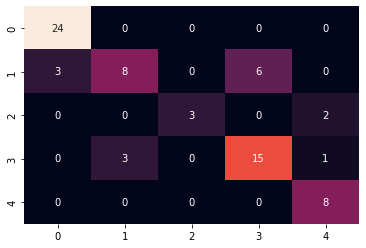

In [53]:
# Predict test set and check metrics

y_pred = modl.predict(X_test)
skor = accuracy_score(y_test, y_pred)
print('Accuracy_score is:', skor)
print("Classification report")
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, cbar=False, fmt='g')
print(classification_report(y_test, y_pred))

#### This is not too bad so we'll be going with it

### Now, we need to know the factors  contributing to predictions

In [54]:
# Thuis are messages to give as factors to the user on app, mapped with each column (feature/factor)

msg =  (
    'Age',
    'Study Hour',
    'Employment Status',
    'Health issue or disability status',
    'Previous mental health diagnoses',
    'Amount of hours spent on Social Media',
    'Amount of hours spent for well being activities',
    'How often its hard to wind down',
    'How often dryness of the mouth is experienced',
    'How difficult it is to experience feeling positive',
    'Experiencing breathing difficulty or not',
    'Whether or not there is difficulty working up the initiative to do things',
    'Trembling experience',
    'Experience of panicking situation',
    'Feeling of having nothing to look forward to or not',
    'Extra curricular activities or not',
    'Attended nursery school or not',
    'Feeling of down-heartedness or not',
    'Ability to become enthusiastic about anything',
    'Feeling that life can be meaningless or not',
    'Feeling scared without reasons or not',)

col_msg = dict(zip(X_train.columns, msg))

In [55]:
# This is not preinstalled, so it's needed

!pip install treeinterpreter 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from treeinterpreter import treeinterpreter as ti 

prediction, bias, contributions = ti.predict(modl[-1], modl[:-1].transform(X_test.head(1)))
nums=[]
for c, feature in sorted(zip(contributions[0], 
                              X_test.columns), 
                          key=lambda x: ~abs(x[0]).all()):
    rnd=c[np.argmax(bias[0])]
    nums.append(rnd)

listd = sorted(zip(X_test.columns,nums),key=lambda x: (x[1])**2)

most = listd[-1][0]

a,b = list(zip(*listd[-6:-1]))
next5  = list(reversed(list(a)))

In [57]:
print('The most important: ',col_msg[most])
print('\n -----------------------\n The next five \n')
for i in next5:
  print(col_msg[i])

The most important:  Employment Status

 -----------------------
 The next five 

Health issue or disability status
Trembling experience
Age
Experiencing breathing difficulty or not
Whether or not there is difficulty working up the initiative to do things
